# Preprocessing Kebakaran

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [1]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Directory for all related files
dataset_dir = '../dataset/'
os.makedirs(dataset_dir, exist_ok=True)

In [17]:
os.listdir(dataset_dir)

['Banjir-2018-2023.csv',
 'Gempa Bumi-2018-2023.csv',
 'Kebakaran-2018-2023.csv',
 'Kecelakaan-2018-2023.csv']

## Loading Dataset

In [18]:
df = pd.read_csv(os.path.join(dataset_dir, 'Kebakaran-2018-2023.csv'))
df = df.drop(columns=['description' , 'url', 'publisher'])
df['title'] = df['title'].apply(lambda x: x.split(' - ')[0])
df = df[['published date', 'title']]
print(df.shape)
df.head()

(7100, 2)


,published date,title
0,2018-01-09 08:00:00+00:00,Cinevista Studios gets notice for fire safety ...
1,2018-02-01 08:00:00+00:00,Sisa Api Unggun Pendaki Diduga Jadi Penyebab K...
2,2018-02-01 08:00:00+00:00,"Kebakaran di Tunjung Maya, 3 Rumah Hangus, Seo..."
3,2018-02-02 08:00:00+00:00,Empat Orang Sekeluarga Tewas dalam Kebakaran d...
4,2018-02-02 08:00:00+00:00,"Kebakaran di Belilas, Dua Ruko dan 12 Kios Han..."


## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [19]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,published date,title
0,2018-01-09 08:00:00+00:00,cinevista studios gets notice for fire safety ...
1,2018-02-01 08:00:00+00:00,sisa api unggun pendaki diduga jadi penyebab k...
2,2018-02-01 08:00:00+00:00,"kebakaran di tunjung maya, 3 rumah hangus, seo..."
3,2018-02-02 08:00:00+00:00,empat orang sekeluarga tewas dalam kebakaran d...
4,2018-02-02 08:00:00+00:00,"kebakaran di belilas, dua ruko dan 12 kios han..."


In [20]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,published date,title,stem
0,2018-01-09 08:00:00+00:00,cinevista studios gets notice for fire safety ...,cinevista studios gets notice for fire safety ...
1,2018-02-01 08:00:00+00:00,sisa api unggun pendaki diduga jadi penyebab k...,sisa api unggun daki duga jadi sebab bakar gun...
2,2018-02-01 08:00:00+00:00,"kebakaran di tunjung maya, 3 rumah hangus, seo...",bakar di tunjung maya 3 rumah hangus orang nen...
3,2018-02-02 08:00:00+00:00,empat orang sekeluarga tewas dalam kebakaran d...,empat orang keluarga tewas dalam bakar di ceng...
4,2018-02-02 08:00:00+00:00,"kebakaran di belilas, dua ruko dan 12 kios han...",bakar di bilas dua ruko dan 12 kios hangus bakar


In [21]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,published date,title,stem,tokens
0,2018-01-09 08:00:00+00:00,cinevista studios gets notice for fire safety ...,cinevista studios gets notice for fire safety ...,"[cinevista, studios, gets, notice, for, fire, ..."
1,2018-02-01 08:00:00+00:00,sisa api unggun pendaki diduga jadi penyebab k...,sisa api unggun daki duga jadi sebab bakar gun...,"[sisa, api, unggun, daki, duga, jadi, sebab, b..."
2,2018-02-01 08:00:00+00:00,"kebakaran di tunjung maya, 3 rumah hangus, seo...",bakar di tunjung maya 3 rumah hangus orang nen...,"[bakar, di, tunjung, maya, 3, rumah, hangus, o..."
3,2018-02-02 08:00:00+00:00,empat orang sekeluarga tewas dalam kebakaran d...,empat orang keluarga tewas dalam bakar di ceng...,"[empat, orang, keluarga, tewas, dalam, bakar, ..."
4,2018-02-02 08:00:00+00:00,"kebakaran di belilas, dua ruko dan 12 kios han...",bakar di bilas dua ruko dan 12 kios hangus bakar,"[bakar, di, bilas, dua, ruko, dan, 12, kios, h..."


In [22]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,published date,title,stem,tokens,tokens_clean
0,2018-01-09 08:00:00+00:00,cinevista studios gets notice for fire safety ...,cinevista studios gets notice for fire safety ...,"[cinevista, studios, gets, notice, for, fire, ...","[cinevista, studios, gets, notice, for, fire, ..."
1,2018-02-01 08:00:00+00:00,sisa api unggun pendaki diduga jadi penyebab k...,sisa api unggun daki duga jadi sebab bakar gun...,"[sisa, api, unggun, daki, duga, jadi, sebab, b...","[sisa, api, unggun, daki, duga, bakar, gunung,..."
2,2018-02-01 08:00:00+00:00,"kebakaran di tunjung maya, 3 rumah hangus, seo...",bakar di tunjung maya 3 rumah hangus orang nen...,"[bakar, di, tunjung, maya, 3, rumah, hangus, o...","[bakar, tunjung, maya, 3, rumah, hangus, orang..."
3,2018-02-02 08:00:00+00:00,empat orang sekeluarga tewas dalam kebakaran d...,empat orang keluarga tewas dalam bakar di ceng...,"[empat, orang, keluarga, tewas, dalam, bakar, ...","[orang, keluarga, tewas, bakar, cengkareng]"
4,2018-02-02 08:00:00+00:00,"kebakaran di belilas, dua ruko dan 12 kios han...",bakar di bilas dua ruko dan 12 kios hangus bakar,"[bakar, di, bilas, dua, ruko, dan, 12, kios, h...","[bakar, bilas, ruko, 12, kios, hangus, bakar]"


In [23]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,published date,title,stem,tokens,tokens_clean,merged
0,2018-01-09 08:00:00+00:00,cinevista studios gets notice for fire safety ...,cinevista studios gets notice for fire safety ...,"[cinevista, studios, gets, notice, for, fire, ...","[cinevista, studios, gets, notice, for, fire, ...",cinevista studios gets notice for fire safety ...
1,2018-02-01 08:00:00+00:00,sisa api unggun pendaki diduga jadi penyebab k...,sisa api unggun daki duga jadi sebab bakar gun...,"[sisa, api, unggun, daki, duga, jadi, sebab, b...","[sisa, api, unggun, daki, duga, bakar, gunung,...",sisa api unggun daki duga bakar gunung talang
2,2018-02-01 08:00:00+00:00,"kebakaran di tunjung maya, 3 rumah hangus, seo...",bakar di tunjung maya 3 rumah hangus orang nen...,"[bakar, di, tunjung, maya, 3, rumah, hangus, o...","[bakar, tunjung, maya, 3, rumah, hangus, orang...",bakar tunjung maya 3 rumah hangus orang nenek ...
3,2018-02-02 08:00:00+00:00,empat orang sekeluarga tewas dalam kebakaran d...,empat orang keluarga tewas dalam bakar di ceng...,"[empat, orang, keluarga, tewas, dalam, bakar, ...","[orang, keluarga, tewas, bakar, cengkareng]",orang keluarga tewas bakar cengkareng
4,2018-02-02 08:00:00+00:00,"kebakaran di belilas, dua ruko dan 12 kios han...",bakar di bilas dua ruko dan 12 kios hangus bakar,"[bakar, di, bilas, dua, ruko, dan, 12, kios, h...","[bakar, bilas, ruko, 12, kios, hangus, bakar]",bakar bilas ruko 12 kios hangus bakar


Drop Useless Data

In [11]:
# Define the values to remove
values_to_remove = ['siswa imanusakti islamic kids learning centre berlatih simulasi penanganan kebakaran', 'ratusan pemuda dilatih jadi relawan damkar', 'tidak digaji, risiko maut, para relawan damkar kalsel bikin kagum relawan negara tetangga', 'berkeliling kota malang dengan mobil pemadam kebakaran', 'bus ""low entry"" transjakarta miliki fitur pencegah kebakaran']

# Check whether each row's value matches any of the removal values
condition = df['title'].isin(values_to_remove)

# Drop the matching rows from the original DataFrame
df.drop(df[condition].index, inplace=True)

In [66]:
df[df['stem'].str.contains('siap')]

,published date,title,stem,tokens,tokens_clean,merged
84,2018-02-26 08:00:00+00:00,"pasar banjarsari kebakaran, pemkot pekalongan ...",pasar banjarsari bakar pemkot kalong siap pasa...,"[pasar, banjarsari, bakar, pemkot, kalong, sia...","[pasar, banjarsari, bakar, pemkot, kalong, pasar]",pasar banjarsari bakar pemkot kalong pasar
181,2018-03-28 07:00:00+00:00,mengintip kesiapan bpbd mencegah kebakaran hut...,intip kesiap bpbd cegah bakar hutan di riau,"[intip, kesiap, bpbd, cegah, bakar, hutan, di,...","[intip, kesiap, bpbd, cegah, bakar, hutan, riau]",intip kesiap bpbd cegah bakar hutan riau
262,2018-04-17 07:00:00+00:00,rusun rawa buaya siap tampung korban kebakaran...,rusun rawa buaya siap tampung korban bakar tam...,"[rusun, rawa, buaya, siap, tampung, korban, ba...","[rusun, rawa, buaya, tampung, korban, bakar, t...",rusun rawa buaya tampung korban bakar taman kota
338,2018-05-15 07:00:00+00:00,"cegah karhutla saat asian games 2018, app sina...",cegah karhutla saat asi games 2018 app sinar m...,"[cegah, karhutla, saat, asi, games, 2018, app,...","[cegah, karhutla, asi, games, 2018, app, sinar...",cegah karhutla asi games 2018 app sinar mas rp...
546,2018-07-12 07:00:00+00:00,kalbar siapkan enam helikopter cegah kebakaran...,kalbar siap enam helikopter cegah bakar hutan,"[kalbar, siap, enam, helikopter, cegah, bakar,...","[kalbar, enam, helikopter, cegah, bakar, hutan]",kalbar enam helikopter cegah bakar hutan
569,2018-07-21 07:00:00+00:00,"informasi potensi gelombang tinggi, potensi ke...",informasi potensi gelombang tinggi potensi bak...,"[informasi, potensi, gelombang, tinggi, potens...","[informasi, potensi, gelombang, potensi, bakar...",informasi potensi gelombang potensi bakar huta...
596,2018-07-30 07:00:00+00:00,"siaga keamanan, dirut angkasa pura ii cek kesi...",siaga aman dirut angkasa pura ii cek kesiap al...,"[siaga, aman, dirut, angkasa, pura, ii, cek, k...","[siaga, aman, dirut, angkasa, pura, ii, cek, k...",siaga aman dirut angkasa pura ii cek kesiap al...
697,2018-08-29 07:00:00+00:00,"kebakaran hutan, tanggung jawab siapa?",bakar hutan tanggung jawab siapa,"[bakar, hutan, tanggung, jawab, siapa]","[bakar, hutan, tanggung]",bakar hutan tanggung
900,2018-11-02 07:00:00+00:00,kebun berisi pohon jati siap jual terbakar,kebun isi pohon jati siap jual bakar,"[kebun, isi, pohon, jati, siap, jual, bakar]","[kebun, isi, pohon, jati, jual, bakar]",kebun isi pohon jati jual bakar
1028,2018-12-12 08:00:00+00:00,sudin penanggulangan kebakaran dan penyelamata...,sudin tanggulang bakar dan selamat jakarta sel...,"[sudin, tanggulang, bakar, dan, selamat, jakar...","[sudin, tanggulang, bakar, selamat, jakarta, s...",sudin tanggulang bakar selamat jakarta selatan...


In [73]:
df = df.drop([180]).reset_index(drop=True)

In [77]:
num = df.loc[177, 'title']
print(num)

kebakaran hanguskan sebagian gedung sdit pesantren siliwangi di leles garut


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

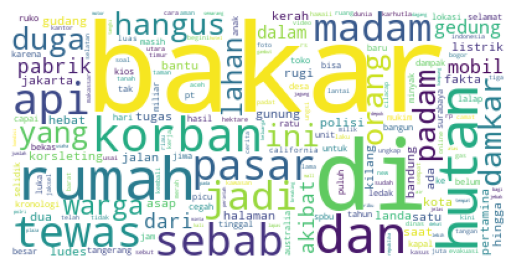

In [13]:
text_before = ' '.join(df['stem'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

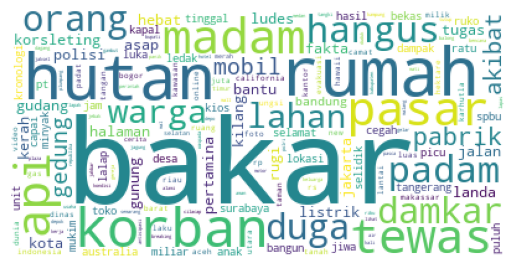

In [28]:
text_after = ' '.join(df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [29]:
# Simpan output ke dalam CSV
df.to_csv('Kebakaran-2018-2023-pre.csv', index=False)